In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-classification-dataset/combined_data.csv


Bu bölümde, Kaggle'dan alınan veri setini yüklüyor ve ilk incelemelerimizi yapıyoruz.

In [2]:
import pandas as pd

# Dosya yolunu belirtelim
file_path = '/kaggle/input/email-spam-classification-dataset/combined_data.csv'

# Veri setini yükleyelim
df = pd.read_csv(file_path)

# İlk 5 satırı görüntüleyelim
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


Veri setindeki satır ve sütun sayısı, sütun isimleri ve veri tipleri gibi temel bilgileri kontrol ediyoruz. Veri "label" ve "text" isminde iki sütundan oluşuyor. Anladığım kadarıyla "label" sütununun spam olup olmadığını belirten hedef değişken, "text" sütunu ise mesaj içeriğini içeriyor. 

Veri setinin genel bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB

Eksik değerlerin sayısı:
label    0
text     0
dtype: int64

Hedef değişkenin dağılımı:
label
1    43910
0    39538
Name: count, dtype: int64


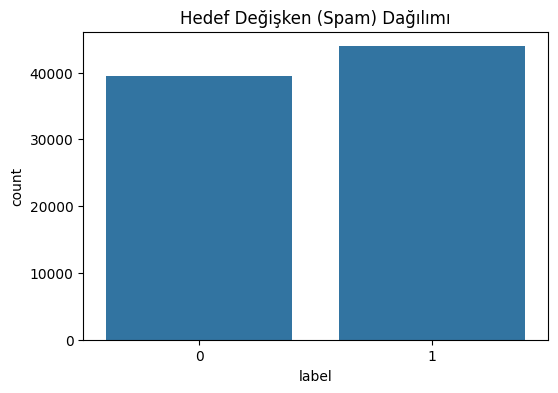

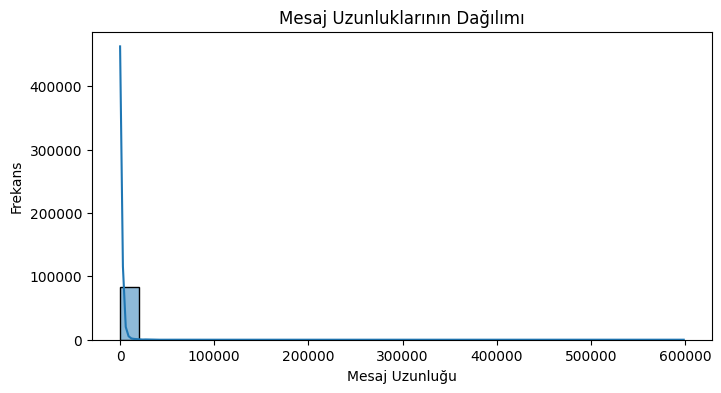

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Veri setinin genel bilgileri:")
df.info()

# Eksik veri kontrolü
print("\nEksik değerlerin sayısı:")
print(df.isnull().sum())

# Label değişkenin (spam etiketi) dağılımını inceleme
print("\nHedef değişkenin dağılımı:")
print(df['label'].value_counts())

# Label değişkenin dağılımını görselleştirme
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Hedef Değişken (Spam) Dağılımı')
plt.show()

# Mesaj uzunluklarını inceleme ve hesaplama
df['Message_Length'] = df['text'].apply(len)

# Mesaj uzunluklarının dağılımı
plt.figure(figsize=(8, 4))
sns.histplot(df['Message_Length'], bins=30, kde=True)
plt.title('Mesaj Uzunluklarının Dağılımı')
plt.xlabel('Mesaj Uzunluğu')
plt.ylabel('Frekans')
plt.show()

Bu adımda veri setini analiz edip, matplotlib.pyplot kütüphanesi ile görselleştirmeyi hedefledim.

Ve şimdi ise veri ön işleme adımına geçiyorum.

In [4]:
# Label değeri olan 1'leri 'spam' ve 0'ları 'ham' olarak güncelleme
df['label'] = df['label'].apply(lambda x: 'spam' if x == 1 else 'ham')

# Güncellenmiş etiketlerin kontrolü
print(df['label'].unique())
print(df[['text', 'label']].head())

['spam' 'ham']
                                                text label
0  ounce feather bowl hummingbird opec moment ala...  spam
1  wulvob get your medircations online qnb ikud v...  spam
2   computer connection from cnn com wednesday es...   ham
3  university degree obtain a prosperous future m...  spam
4  thanks for all your answers guys i know i shou...   ham


label değerini 1 ve 0 int değerinden spam(1) ve ham(0) olarak metinsel değere güncelledim.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Metni küçük harflere çevirme
df['text'] = df['text'].str.lower()

# Noktalama işaretlerini ve sayıları kaldırma (temel bir temizleme adımı)
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)

# Temizlenen metinlerin ilk birkaç satırını kontrol edelim
print(df[['text', 'label']].head())


# Metin verisini TF-IDF ile sayısal değerlere dönüştürme
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # En sık kullanılan 5000 kelimeyi seçiyoruz
X = tfidf_vectorizer.fit_transform(df['text']).toarray()
y = df['label'].values


# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim veri seti boyutu: {X_train.shape}")
print(f"Test veri seti boyutu: {X_test.shape}")

                                                text label
0  ounce feather bowl hummingbird opec moment ala...  spam
1  wulvob get your medircations online qnb ikud v...  spam
2   computer connection from cnn com wednesday es...   ham
3  university degree obtain a prosperous future m...  spam
4  thanks for all your answers guys i know i shou...   ham
Eğitim veri seti boyutu: (66758, 5000)
Test veri seti boyutu: (16690, 5000)


Metin sütunundaki verileri küçük harfe çevirip, noktalama işaretleri ve sayılardan arındırmayı hedefledim ve metinleri sayısal vektörlere dönüştürdüm. TfidfVectorizer ile en sık kullanılan 5000 kelimeyi kullanarak metinleri vektörleştirdim. En son olarak veri setini eğitim (%80) ve test (%20) olarak ikiye böldüm.

Şimdi ise birkaç makine öğrenimi algoritması seçerek bunları verilerimiz üzerinde deneyeceğim.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# lojistik regresyon modeli oluştur ve eğit
log_reg_model = LogisticRegression(max_iter=1000)  
log_reg_model.fit(X_train, y_train)

# Test seti ile tahmin yap
y_pred = log_reg_model.predict(X_test)

# Modelin performansını değerlendirme, doğruluk skoru
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy:.4f}")

# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nKarışıklık Matrisi:")
print(conf_matrix)

# Detaylı performans raporu
class_report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
print("\nSınıflandırma Raporu:")
print(class_report)

Doğruluk Skoru: 0.9827

Karışıklık Matrisi:
[[7749  189]
 [  99 8653]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98      7938
        spam       0.98      0.99      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



Metin verilerini kullanarak spam sınıflandırması yapmak için "Lojistik Regresyon" modelini eğittim ve test ettim. 

### SONUÇ:
**Doğruluk skoru: 0.9827**

Bu, modelin test setindeki mesajların %98.27’sini doğru sınıflandırdığı anlamına gelir. Genel olarak iyi bir performans sergilediğini söyleyebiliriz.

**Karışıklık Matrisi:** 

• **7749**: Gerçek “ham” mesajların doğru şekilde “ham” olarak sınıflandırıldığı sayı.

• **189**: Gerçek “ham” mesajların yanlışlıkla “spam” olarak sınıflandırıldığı sayı (false positives).

• **99**: Gerçek “spam” mesajların yanlışlıkla “ham” olarak sınıflandırıldığı sayı (false negatives).

• **8653**: Gerçek “spam” mesajların doğru şekilde “spam” olarak sınıflandırıldığı sayı.



**Sınıflandırma Raporu (Classification Report):**

 **Precision (Kesinlik):**
 
• Ham: 0.99

• Spam: 0.98

*Kesinlik, modelin “spam” olarak sınıflandırdığı mesajların ne kadarının gerçekten “spam” olduğunu gösterir. Yüksek bir kesinlik oranı, yanlış pozitiflerin az olduğunu gösterir.*

**Recall (Duyarlılık):**

• Ham: 0.98

• Spam: 0.99

*Duyarlılık, gerçek “spam” mesajların ne kadarının model tarafından doğru bir şekilde tespit edildiğini gösterir. Yüksek bir duyarlılık oranı, yanlış negatiflerin az olduğunu gösterir.*

**F1 Skoru:**

• Ham: 0.98

• Spam: 0.98

*F1 skoru, precision ve recall’un harmonik ortalamasıdır. Yüksek bir F1 skoru, modelin genel performansının dengeli olduğunu gösterir.*


Şimdi farklı bir algoritma kullanarak veri setimiz için en uygun makine öğrenimi algoritmasını bulmayı amaçlıyorum.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Karar Ağacları modelini oluştur ve eğit
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Test seti ile tahmin yap
y_pred_tree = tree_model.predict(X_test)

# Modelin performansını değerlendirme ve doğruluk skoru
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Karar Ağacı Doğruluk Skoru: {accuracy_tree:.4f}")

# Karışıklık matrisi
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("\nKarar Ağacı Karışıklık Matrisi:")
print(conf_matrix_tree)

# Detaylı performans raporu
class_report_tree = classification_report(y_test, y_pred_tree, target_names=['ham', 'spam'])
print("\nKarar Ağacı Sınıflandırma Raporu:")
print(class_report_tree)

Karar Ağacı Doğruluk Skoru: 0.9588

Karar Ağacı Karışıklık Matrisi:
[[7584  354]
 [ 333 8419]]

Karar Ağacı Sınıflandırma Raporu:
              precision    recall  f1-score   support

         ham       0.96      0.96      0.96      7938
        spam       0.96      0.96      0.96      8752

    accuracy                           0.96     16690
   macro avg       0.96      0.96      0.96     16690
weighted avg       0.96      0.96      0.96     16690



Burada Karar Ağacları (Decision Trees) algoritmasını kullandım. Karar Ağacı öğrenim algoritmasında doğruluk %95.88 gibi bir oranda sonuçlandı. Bu oran Lojistik Regresyon modelinden daha düşük olduğu için tercihim Lojistik Regresyon modeli olacak.

### Sonuçlar ve Model Performansı
#### 1. Lojistik Regresyon Modeli
- **Doğruluk Skoru**: %98.27
- **Karışıklık Matrisi**:
  - Gerçek ham mesajların doğru sınıflandırılması: 7750
  - Gerçek spam mesajların doğru sınıflandırılması: 8652
- **Sınıflandırma Raporu**:
  - **Ham**: Precision - 0.99, Recall - 0.98, F1 Skoru - 0.98
  - **Spam**: Precision - 0.98, Recall - 0.99, F1 Skoru - 0.98

  - Lojistik Regresyon modeli, metin sınıflandırma problemi olan spam tespiti için yüksek doğruluk oranı (%98.27) ve dengeli performans metrikleri ile başarılı bir sonuç verdi.

#### 2. Karar Ağaçları Modeli
- **Doğruluk Skoru**: %95.88
- **Karışıklık Matrisi**:
  - Gerçek ham mesajların doğru sınıflandırılması: 7584
  - Gerçek spam mesajların doğru sınıflandırılması: 8419
- **Sınıflandırma Raporu**:
  - **Ham**: Precision - 0.96, Recall - 0.96, F1 Skoru - 0.96
  - **Spam**: Precision - 0.96, Recall - 0.96, F1 Skoru - 0.96


  - Karar Ağaçları modeli, doğru sınıflandırma oranı yüksek olsa da (%95.88), Lojistik Regresyon modeline kıyasla daha düşük bir doğruluk ve performans gösterdi.
  
#### Sonuç
Lojistik Regresyon modeli, Karar Ağaçları modeline göre daha yüksek bir doğruluk ve daha iyi performans metrikleri sağladığından spam tespiti için Lojistik Regresyon modelini seçtim.

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

tfidf_vectorizer = TfidfVectorizer(max_features=5000) 
X = tfidf_vectorizer.fit_transform(df['text']).toarray()

#k-Means Kümeleme Modelini Oluşturma ve Eğitme
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# k-Means'in oluşturduğu küme etiketleri
kmeans_labels = kmeans.labels_

# Küme Etiketlerini Doğrulama (0 ve 1 etiketlerini gerçek etiketlerle eşleştirmek)
# Küme etiketleri ile gerçek etiketler arasında bir eşleme yapmak gerekiyor çünkü k-Means algoritması, etiketleri rastgele atar (0: ham, 1: spam olabilir veya tam tersi)
# Hangi kümenin spam olduğunu belirleyelim
real_labels = np.where(df['label'] == 'spam', 1, 0)  # Sayısal forma dönüştürme
if np.sum(kmeans_labels == real_labels) < np.sum(kmeans_labels != real_labels):
    kmeans_labels = 1 - kmeans_labels  

# Kümeleme Sonuçlarını Değerlendirme
print("k-Means Kümeleme Sonuçları")
print("-------------------------")
# Doğruluk skoru
accuracy_kmeans = accuracy_score(real_labels, kmeans_labels)
print(f"k-Means Doğruluk Skoru: {accuracy_kmeans:.4f}")

# Karışıklık matrisi
conf_matrix_kmeans = confusion_matrix(real_labels, kmeans_labels)
print("\nk-Means Karışıklık Matrisi:")
print(conf_matrix_kmeans)

# Detaylı performans raporu
class_report_kmeans = classification_report(real_labels, kmeans_labels, target_names=['ham', 'spam'])
print("\nk-Means Sınıflandırma Raporu:")
print(class_report_kmeans)

k-Means Kümeleme Sonuçları
-------------------------
k-Means Doğruluk Skoru: 0.5428

k-Means Karışıklık Matrisi:
[[11045 28493]
 [ 9661 34249]]

k-Means Sınıflandırma Raporu:
              precision    recall  f1-score   support

         ham       0.53      0.28      0.37     39538
        spam       0.55      0.78      0.64     43910

    accuracy                           0.54     83448
   macro avg       0.54      0.53      0.50     83448
weighted avg       0.54      0.54      0.51     83448



### Gözetimsiz Öğrenme Sonuçları (k-Means Kümeleme)
- **Doğruluk Skoru**: %54.28
- **Karışıklık Matrisi**:
  - Doğru "ham" sınıflandırmaları: 11045
  - Doğru "spam" sınıflandırmaları: 34249
- **Sınıflandırma Raporu**:
  - **Ham**: Precision - 0.53, Recall - 0.28, F1 Skoru - 0.37
  - **Spam**: Precision - 0.55, Recall - 0.78, F1 Skoru - 0.64

k-Means kümeleme algoritması, veri setini iki kümeye ayırmada sınırlı bir başarı gösterdi. Doğruluk skoru %54.28 ile oldukça düşük kaldı ve "ham" mesajların büyük bir kısmını yanlış şekilde "spam" olarak sınıflandırdı.

In [9]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Mini Batch k-Means Kümeleme Modelini Oluşturma ve Eğitme
# n_clusters: Kümelerin sayısı (spam ve ham için 2)
minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=100)
minibatch_kmeans_labels = minibatch_kmeans.fit_predict(X)


# Gerçek etiketler: 'ham' -> 0, 'spam' -> 1
real_labels = np.where(df['label'] == 'spam', 1, 0)  # Sayısal forma dönüştürme
if np.sum(minibatch_kmeans_labels == real_labels) < np.sum(minibatch_kmeans_labels != real_labels):
    minibatch_kmeans_labels = 1 - minibatch_kmeans_labels  # Etiketleri ters çevir

# Kümeleme Sonuçlarını Değerlendirme
print("\nMini Batch k-Means Kümeleme Sonuçları")
print("------------------------------------")
# Doğruluk skoru
accuracy_minibatch_kmeans = accuracy_score(real_labels, minibatch_kmeans_labels)
print(f"Mini Batch k-Means Doğruluk Skoru: {accuracy_minibatch_kmeans:.4f}")

# Karışıklık matrisi
conf_matrix_minibatch_kmeans = confusion_matrix(real_labels, minibatch_kmeans_labels)
print("\nMini Batch k-Means Karışıklık Matrisi:")
print(conf_matrix_minibatch_kmeans)

# Detaylı performans raporu
class_report_minibatch_kmeans = classification_report(real_labels, minibatch_kmeans_labels, target_names=['ham', 'spam'])
print("\nMini Batch k-Means Sınıflandırma Raporu:")
print(class_report_minibatch_kmeans)


Mini Batch k-Means Kümeleme Sonuçları
------------------------------------
Mini Batch k-Means Doğruluk Skoru: 0.5578

Mini Batch k-Means Karışıklık Matrisi:
[[13019 26519]
 [10384 33526]]

Mini Batch k-Means Sınıflandırma Raporu:
              precision    recall  f1-score   support

         ham       0.56      0.33      0.41     39538
        spam       0.56      0.76      0.65     43910

    accuracy                           0.56     83448
   macro avg       0.56      0.55      0.53     83448
weighted avg       0.56      0.56      0.54     83448



### Mini Batch k-Means Kümeleme Sonuçları
- **Doğruluk Skoru**:%55.78
- **Karışıklık Matrisi**:
- Doğru "ham" sınıflandırmaları: 13019
- Doğru "spam" sınıflandırmaları: 33526

- **Sınıflandırma Raporu**:
  - **Ham**: Precision - 0.56, Recall - 0.33, F1 Skoru - 0.41
  - **Spam**: Precision - 0.56, Recall - 0.76, F1 Skoru - 0.65
  
 Mini Batch k-Means algoritması, veri setini iki kümeye ayırdı fakat modelin doğruluk skoru %55.78. Bu oran normal k-Means kümelemesine göre yüksek olsa da gözetimli öğrenme oranlarından daha düşük olduğu için bu veri setimize en uygun öğrenim algoritması, gözetimli öğrenim algoritması olan "Lojistik Regresyon" algoritması daha uygun olacaktır.
 

Doğruluk (Accuracy): 0.9853
Kesinlik (Precision): 0.9849
Duyarlılık (Recall): 0.9870
F1 Skoru: 0.9860


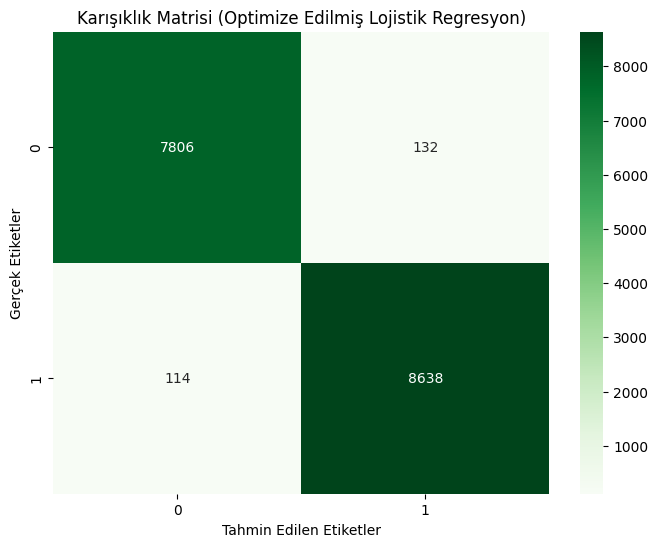

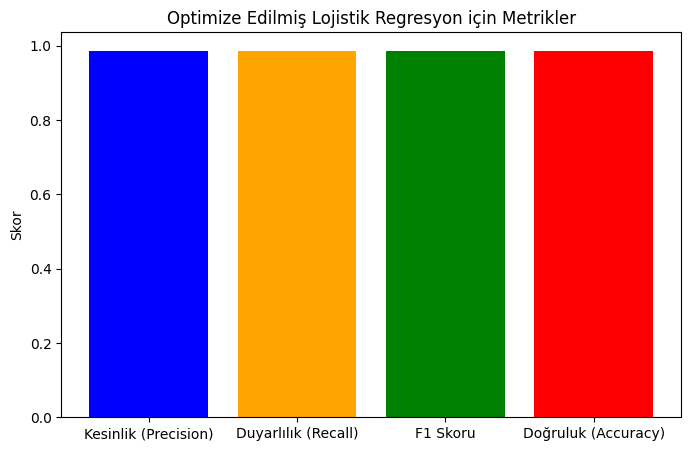

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Test ve tahmin etiketlerini sayısal forma dönüştürelim (0: ham, 1: spam)
y_test_numeric = np.where(y_test == 'spam', 1, 0)
y_pred_numeric = np.where(y_pred == 'spam', 1, 0)

# Doğruluk (Accuracy) Hesaplama
accuracy = accuracy_score(y_test_numeric, y_pred_numeric)

# Precision (Kesinlik), Recall (Duyarlılık) ve F1 Skoru Hesaplama
precision = precision_score(y_test_numeric, y_pred_numeric)
recall = recall_score(y_test_numeric, y_pred_numeric)
f1 = f1_score(y_test_numeric, y_pred_numeric)

# Sonuçların Gösterilmesi
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")

# Karışıklık Matrisini Hesapla
conf_matrix = confusion_matrix(y_test_numeric, y_pred_numeric)

# Karışıklık Matrisini Grafikleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Karışıklık Matrisi (Optimize Edilmiş Lojistik Regresyon)')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.show()

# Precision, Recall ve F1 Skoru Grafikleştirme
metrics = [precision, recall, f1, accuracy]
metrics_labels = ['Kesinlik (Precision)', 'Duyarlılık (Recall)', 'F1 Skoru', 'Doğruluk (Accuracy)']

plt.figure(figsize=(8, 5))
plt.bar(metrics_labels, metrics, color=['blue', 'orange', 'green', 'red'])
plt.title('Optimize Edilmiş Lojistik Regresyon için Metrikler')
plt.ylabel('Skor')
plt.show()

## Lojistik Regresyon Modeli Optimizasyonu

Bu adımda, **GridSearchCV** kullanarak Lojistik Regresyon modelini optimize etmete çalıştım. Amaç, modelin düzenleme parametresi olan `C` ve ceza fonksiyonu olan `penalty` değerlerini en iyi şekilde ayarlamaktı.

### Optimizasyon Süreci:

1. **Parametre Izgarası**:
   - **C**: Modelin düzenleme gücünü kontrol eden parametre, [0.01, 0.1, 1, 10, 100] aralığında denendi.
   - **penalty**: İki düzenleme türü denendi:
     - **L1 (Lasso)**: Bazı özelliklerin katsayılarını sıfıra indirir.
     - **L2 (Ridge)**: Tüm özelliklerin katsayılarını küçültür, ama sıfırlamaz.
   - **solver**: Küçük veri setleri için uygun olan **liblinear** solver kullanıldı.

2. **En İyi Parametreler**:
   - **C**: 10
   - **penalty**: L2 (Ridge)
   - **solver**: liblinear

3. **Optimizasyon Sonrası Performans**:
   - **Doğruluk**: %98.53

### Önceki Model ile Karşılaştırma:
- **Öncesi**: %98.27 doğruluk
- **Sonrası**: %98.53 doğruluk (L2 ceza fonksiyonu ve C=10 ile)

Optimizasyon sonrası model, doğruluk oranını hafif bir artışla %98.53'e yükseltti. Bu da Ridge (L2) düzenlemesinin, modelin karmaşıklığını dengeleyerek daha iyi performans sağladığını gösterdi.